## Hand-written digits

Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

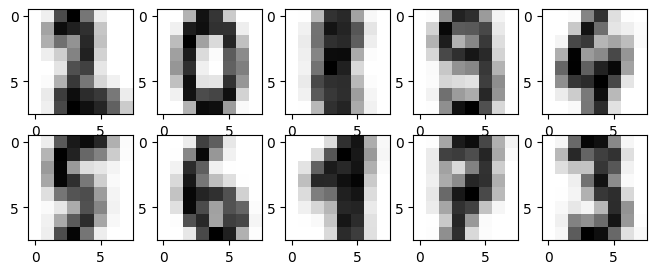

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

Accuracy score:  0.7885364496382861


/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_54705/2818818069.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred[mask] = mode(digits.target[mask])[0]


Text(598.2222222222223, 0.5, 'True')

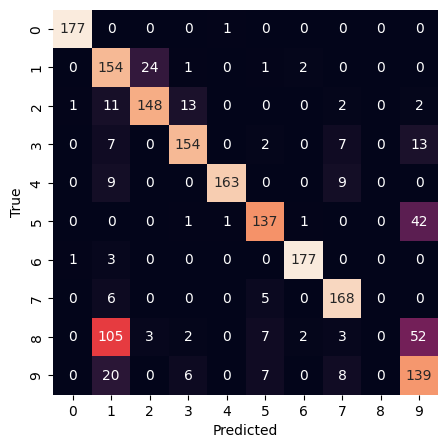

In [4]:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #mode to get the most correctly classified
    pred[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(digits.target, pred))
mat = confusion_matrix(digits.target, pred)
plt.figure(figsize=(16, 5))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")

The main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing *k*-means.

In [5]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, random_state=0)
projected_X = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(projected_X)

# Permute the labels
pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    pred[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, pred)

#yay, after cleaning some noise, we got even higher accuracy!

/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_54705/3597979778.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred[mask] = mode(digits.target[mask])[0]


0.9449081803005008